In [128]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from imblearn.over_sampling import SMOTE

In [130]:
wine = pd.read_csv("winequality-red 2.csv")

In [132]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [134]:
wine_copy = wine.copy()

In [136]:
wine_copy['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [139]:
X = wine.drop(columns=["quality","fixed acidity"])
y = wine["quality"]

original_columns = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Epoch 1/70


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4378 - loss: 1.4532 - val_accuracy: 0.3263 - val_loss: 1.1678
Epoch 2/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.6206 - loss: 0.9535 - val_accuracy: 0.3958 - val_loss: 1.0445
Epoch 3/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.6471 - loss: 0.8575 - val_accuracy: 0.5529 - val_loss: 0.9522
Epoch 4/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.7049 - loss: 0.7326 - val_accuracy: 0.6979 - val_loss: 0.7870
Epoch 5/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.7261 - loss: 0.6992 - val_accuracy: 0.8429 - val_loss: 0.4424
Epoch 6/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.7421 - loss: 0.6516 - val_accuracy: 0.8187 - val_loss: 0.5230
Epoch 7/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.7550 - loss: 0.6270 - val_accuracy: 0.8036 - val_loss: 0.5366
Epoch 8/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.7562 - loss: 0.6101 - val_accuracy: 0.7915 - val_lo

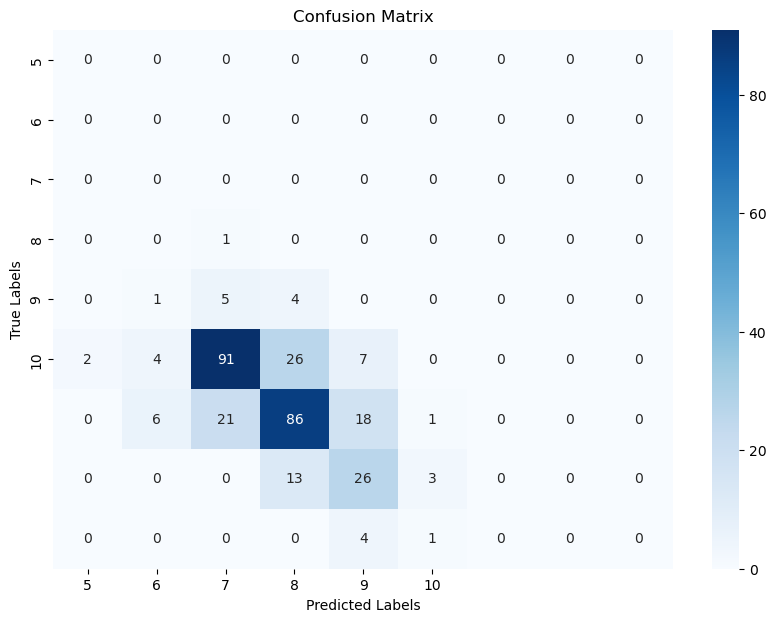

In [151]:
def adjust_labels(labels): # important as the rating starts at
    return labels - 3

adjusted_y_train = adjust_labels(y_train)
adjusted_y_test = adjust_labels(y_test)

num_classes = 6
one_hot_y_train = keras.utils.to_categorical(adjusted_y_train, num_classes=num_classes) # converts into ohe vector as classification


modelANN = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

modelANN.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history = modelANN.fit(X_train, one_hot_y_train, epochs = 70, validation_split = 0.1, verbose = 1, class_weight = class_weights_dict  )

y_pred_prob = modelANN.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis = 1)

print("Size of y_pred:", len(y_pred))
print("Size of labels_test_integers:", len(adjusted_y_test))


if len(y_pred) == len(y_test):
    print("Classification Report:\n", classification_report(adjusted_y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(adjusted_y_test, y_pred))
    print("Accuracy Score:", accuracy_score(adjusted_y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes)+5, yticklabels=np.arange(num_classes)+5)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("Error: The number of predictions does not match the number of true labels.")
    
    

                       



In [120]:
modelANN.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,828 (139.96 KB)

 Trainable params: 11,942 (46.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,886 (93.31 KB)

#### Implementing L2 Regularization, useless

Epoch 1/70


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4060 - loss: 2.7630 - val_accuracy: 0.0000e+00 - val_loss: 2.1907
Epoch 2/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.5653 - loss: 1.7878 - val_accuracy: 0.3867 - val_loss: 1.5956
Epoch 3/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.6061 - loss: 1.4697 - val_accuracy: 0.6012 - val_loss: 1.3113
Epoch 4/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.6331 - loss: 1.3020 - val_accuracy: 0.2205 - val_loss: 1.5504
Epoch 5/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.6432 - loss: 1.2127 - val_accuracy: 0.4955 - val_loss: 1.2474
Epoch 6/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.6381 - loss: 1.1860 - val_accuracy: 0.3656 - val_loss: 1.4040
Epoch 7/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - accuracy: 0.6482 - loss: 1.1424 - val_accuracy: 0.2719 - val_loss: 1.4186
Epoch 8/70
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.6692 - loss: 1.1031 - val_accuracy: 0.5740 - va

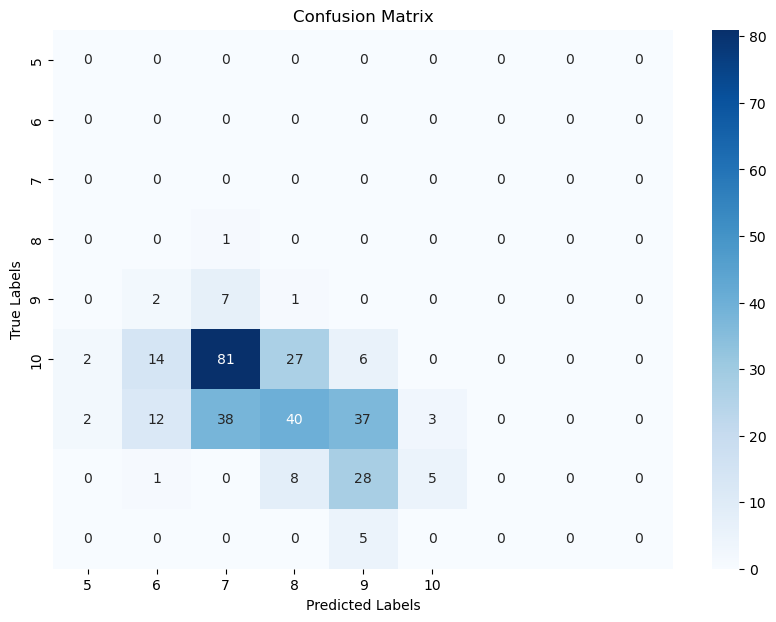

In [125]:
modelANN = keras.Sequential([
    
    keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    keras.layers.Dense(32, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    keras.layers.Dense(num_classes, activation='softmax')  
])

modelANN.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history = modelANN.fit(X_train, one_hot_y_train, epochs = 70, validation_split = 0.1, verbose = 1)

y_pred_prob = modelANN.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis = 1)

print("Size of y_pred:", len(y_pred))
print("Size of labels_test_integers:", len(adjusted_y_test))


if len(y_pred) == len(y_test):
    print("Classification Report:\n", classification_report(adjusted_y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(adjusted_y_test, y_pred))
    print("Accuracy Score:", accuracy_score(adjusted_y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes)+5, yticklabels=np.arange(num_classes)+5)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("Error: The number of predictions does not match the number of true labels.")

